In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [25]:
result_file = './mri_results/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
diff_recon = cont['recon']
adj_img = cont['adj_img']
print(diff_recon.shape)

dict_keys(['gt_img', 'recon', 'adj_img', 'nrmse', 'ssim'])
(5, 1, 256, 256)


5


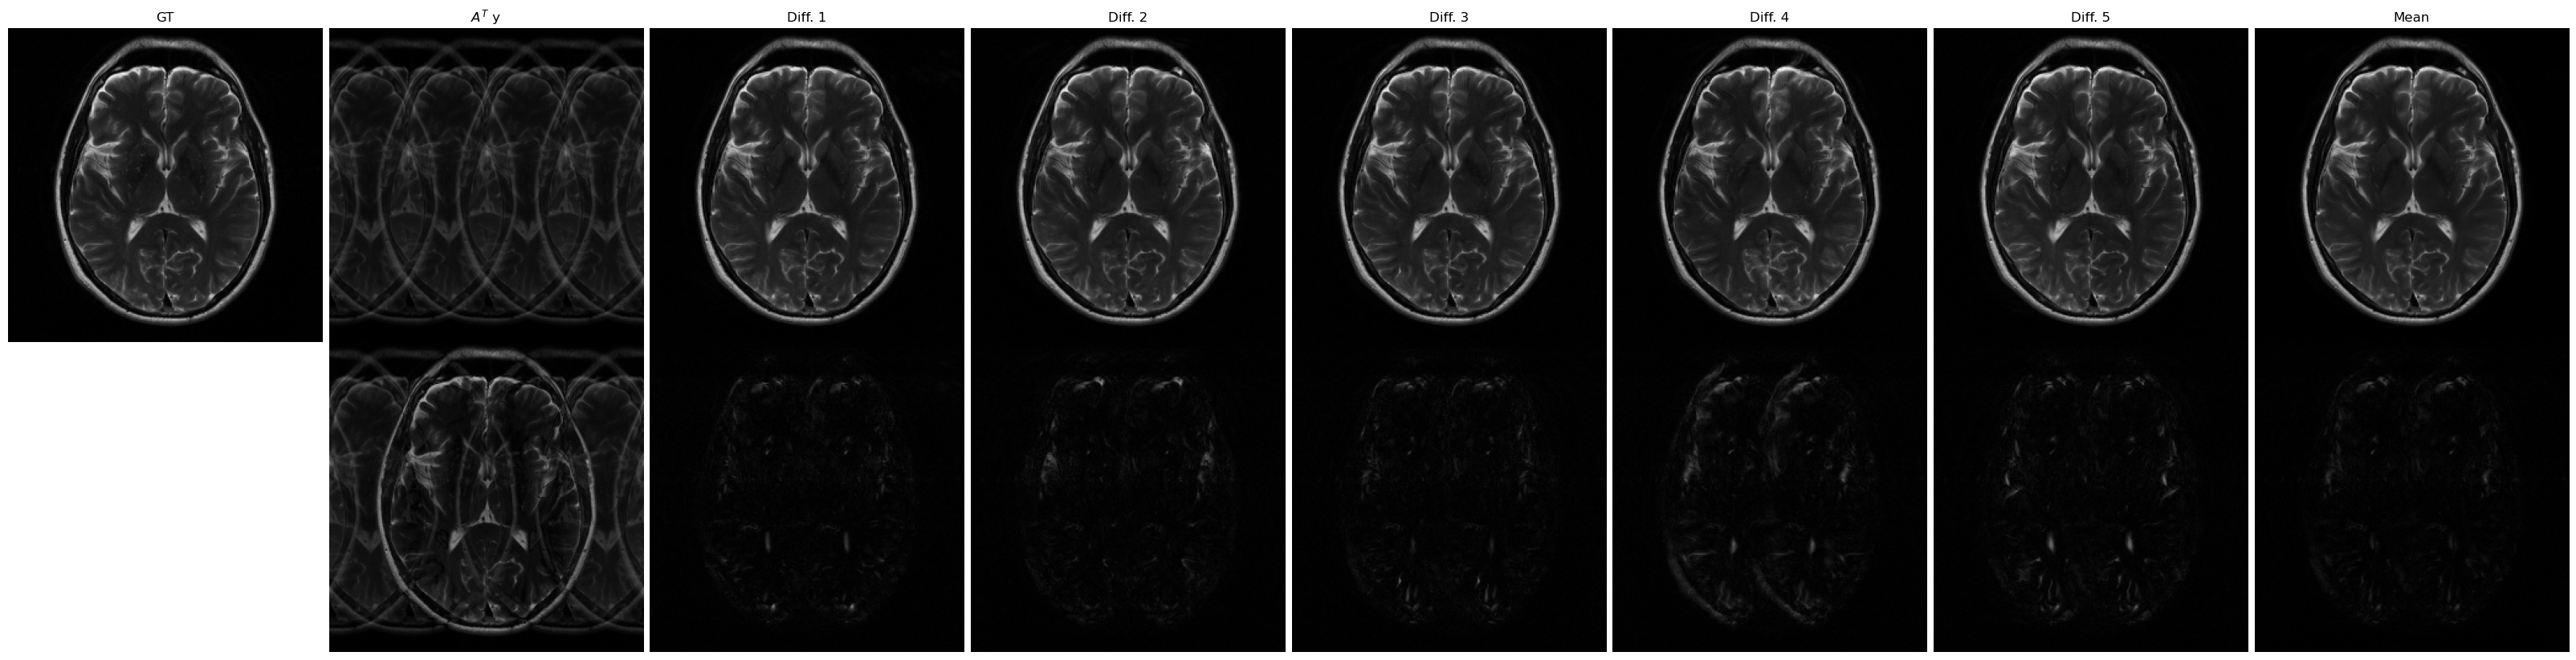

In [28]:
batches = diff_recon.shape[0]
print(batches)
vmin = 0
vmax = 1.0

plt.figure(figsize=(32,8))
plt.subplot(2,3+batches,1)
plt.title('GT')
plt.imshow(np.flipud(abs(gt_img[0,0])), cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')

plt.subplot(2,3+batches,2)
plt.title('$A^T$ y')
plt.imshow(np.flipud(abs(adj_img[0,0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3+batches,3+batches+2)
plt.imshow(np.flipud(abs(gt_img[0,0]-adj_img[0,0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')

for i in range(batches):
    plt.subplot(2,3+batches,3+i)
    plt.title(f'Diff. {i+1}')
    plt.imshow(np.flipud(abs(diff_recon[i,0])),cmap='gray', vmin = vmin, vmax = vmax)
    plt.axis('off')
    plt.subplot(2,3+batches,3+batches+2+1+i)
    plt.imshow(np.flipud(abs(gt_img[0,0]-diff_recon[i,0])),cmap='gray',vmin = vmin, vmax = vmax)
    plt.axis('off')

mean_recon = np.mean(diff_recon,axis=0)
plt.subplot(2,3+batches,3+batches)
plt.title(f'Mean')
plt.imshow(np.flipud(abs(mean_recon[0])),cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')
plt.subplot(2,3+batches,(3+batches)*2)
plt.imshow(np.flipud(abs(gt_img[0,0]-mean_recon[0])),cmap='gray',vmin = vmin, vmax = vmax)
plt.axis('off')

plt.tight_layout(pad=0.2)